Enter the stock ticker (e.g., AAPL): WMT


[*********************100%***********************]  1 of 1 completed
<ipython-input-20-4336138e5cc0>:40: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sma_50 = float(last_row['SMA_50'])
<ipython-input-20-4336138e5cc0>:41: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sma_200 = float(last_row['SMA_200'])
<ipython-input-20-4336138e5cc0>:42: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  rsi = float(last_row['RSI'])


Trading Decision for WMT: HOLD


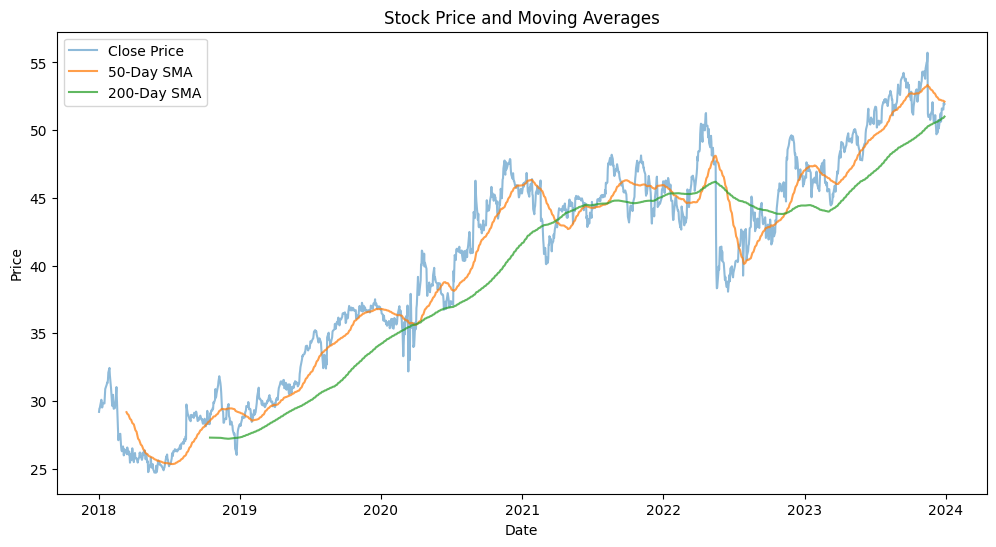

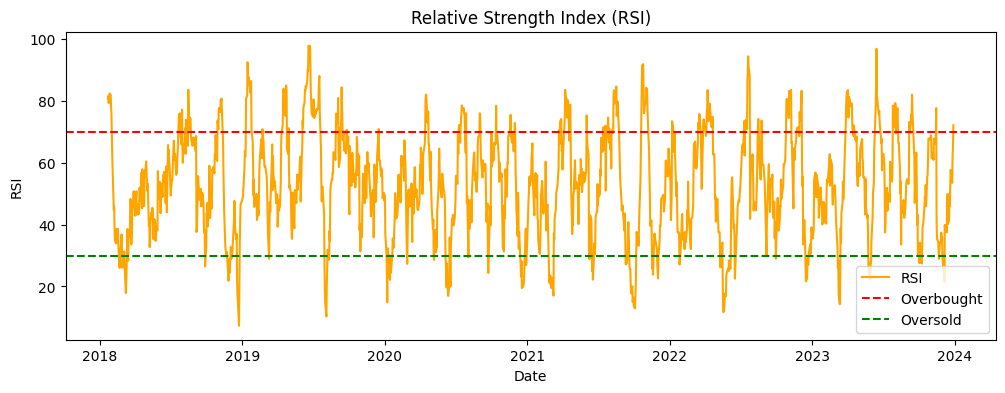

In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def fetch_stock_data(ticker, start_date, end_date):
    """Fetching historical stock data."""
    try:
        return yf.download(ticker, start=start_date, end=end_date)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

def calculate_technical_indicators(stock_data):
    """Calculating moving averages and RSI."""
    stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
    stock_data['SMA_200'] = stock_data['Close'].rolling(window=200).mean()

    # Relative Strength Index
    delta = stock_data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()

    rs = avg_gain / avg_loss
    stock_data['RSI'] = 100 - (100 / (1 + rs))

    return stock_data

def make_trading_decision(stock_data):
    """Makinnb BUY or SELL decision based on SMA and RSI."""
    try:
        last_row = stock_data.iloc[-1]

        if last_row[['SMA_50', 'SMA_200', 'RSI']].isnull().any():
            return 'HOLD'

        sma_50 = float(last_row['SMA_50'])
        sma_200 = float(last_row['SMA_200'])
        rsi = float(last_row['RSI'])

        if sma_50 > sma_200 and rsi < 70:
            decision = 'BUY'
        elif sma_50 < sma_200 and rsi > 30:
            decision = 'SELL'
        else:
            decision = 'HOLD'

        return decision
    except IndexError:
        return 'HOLD'
    except ValueError as e:
        print(f"Error in decision calculation: {e}")
        return 'HOLD'

def plot_indicators(stock_data):
    """Ploting stock price and technical indicators."""
    plt.figure(figsize=(12, 6))

    plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
    plt.plot(stock_data['SMA_50'], label='50-Day SMA', alpha=0.75)
    plt.plot(stock_data['SMA_200'], label='200-Day SMA', alpha=0.75)
    plt.title('Stock Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 4))
    plt.plot(stock_data['RSI'], label='RSI', color='orange')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='green', linestyle='--', label='Oversold')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

def main():
    ticker = input("Enter the stock ticker (e.g., AAPL): ")
    start_date = '2018-01-01'
    end_date = '2023-12-31'

    # Fetching stock data
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    if stock_data is None or stock_data.empty:
        print(f"No data found for the ticker {ticker}. Please check the ticker symbol.")
        return

    # Calculating technical indicators
    stock_data = calculate_technical_indicators(stock_data)

    # Making trading decision
    decision = make_trading_decision(stock_data)
    print(f"Trading Decision for {ticker}: {decision}")


    plot_indicators(stock_data)

if __name__ == "__main__":
    main()
